In [1]:
import ee
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWgBAmmOYs_VKdaVIvZH4rU3MvrIdjHI8Nz1BZihb21-9L2-tExhVO8

Successfully saved authorization token.


In [140]:
ic = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['chlor_a','sst','poc']).filterDate('2020-03-01', '2020-09-01');
# lon = -64.8857
# lat = 32.381155
lon = -4.237
lat = 49.88

cntr = ee.Geometry.Point(lon,lat)

In [158]:
scale = 1000
ic_pix=ic.getRegion(cntr, scale).getInfo()

In [170]:
def valid_row(row):
    return row[4] != None or row[5] != None #or row[6] != None

valid = [valid_row(rw) for rw in ic_pix]
data_pix = np.array(ic_pix)[valid]
data_pix

array([['id', 'longitude', 'latitude', 'time', 'chlor_a', 'sst', 'poc'],
       ['A2020061', -4.235556564623544, 49.878956150736435,
        1583022301000, None, 9.210000038146973, None],
       ['A2020063', -4.235556564623544, 49.878956150736435,
        1583194201000, 0.7090513706207275, 10.154999732971191, 152],
       ['A2020066', -4.235556564623544, 49.878956150736435,
        1583455501000, None, 9.934999465942383, None],
       ['A2020072', -4.235556564623544, 49.878956150736435,
        1583971501000, None, 10.045000076293945, None],
       ['A2020076', -4.235556564623544, 49.878956150736435,
        1584317700000, 0.6061405539512634, 10.569999694824219,
        144.8000030517578],
       ['A2020083', -4.235556564623544, 49.878956150736435,
        1584922801000, 0.9493723511695862, 10.03499984741211,
        345.79998779296875],
       ['A2020084', -4.235556564623544, 49.878956150736435,
        1585009801000, None, 10.434999465942383, None],
       ['A2020085', -4.23555656462

In [162]:
df_pix = pd.DataFrame(data_pix[1:],columns=data[0])
df_pix.time = pd.to_datetime(df_pix.time, unit='ms')

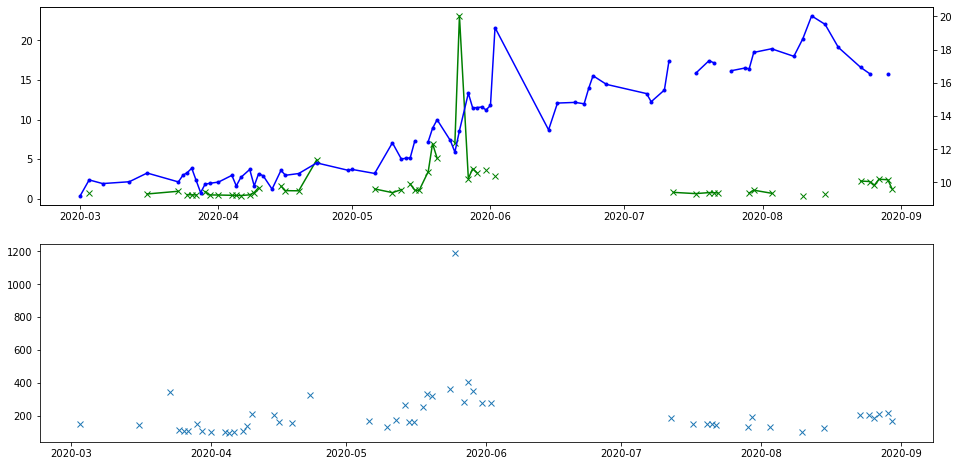

In [163]:

x=df_pix['time']
y1=df_pix['chlor_a']
y2=df_pix['sst']

fig, (ax1, ax3) = plt.subplots(2,1,figsize=(16,8))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g', marker='x')
ax2.plot(x, y2, 'b', marker='.')

ax3.plot(x,df_pix['poc'],'x')

In [168]:
ic = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['chlor_a','sst']).filterDate('2020-03-01', '2020-09-01');

area = cntr.buffer(10000)
chl_box = ic.getRegion(area,scale).getInfo()

In [177]:
valid = [valid_row(rw) for rw in chl_box]
data = np.array(chl_box)[valid]
df = pd.DataFrame(data[1:],columns=data[0])
df = df.set_index([('longitude','latitude')])
df

KeyError: "None of [('longitude', 'latitude')] are in the columns"

In [176]:
df = df.to_xarray()
df

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

In [150]:
fig,ax = plt.subplots()
ax.scatter(df_.longitude,df_.latitude,1df_.sst)

SyntaxError: invalid syntax (Temp/ipykernel_10084/3575371023.py, line 2)

In [82]:
df=df_chl_box.set_index(['time','latitude','longitude'])
ds=xr.Dataset.from_dataframe(df)

# # row data to be gridded
# data = {"lat": [0, 0, 2], "lon": [1, 2, 0], "time": [0, 1, 2], "values": [20, 50, 30]}
# df_rows = pd.DataFrame(data).set_index(["time", "lon", "lat"])

#ds = xr.Dataset.from_dataframe(df_rows)
ds

<xarray.Dataset>
Dimensions:    (time: 450, latitude: 20, longitude: 23)
Coordinates:
  * time       (time) int64 1451607301000 1451866201000 ... 1517272201000
  * latitude   (latitude) float64 30.92 30.92 30.93 30.94 ... 31.07 31.08 31.09
  * longitude  (longitude) float64 -64.1 -64.09 -64.08 ... -63.92 -63.91 -63.9
Data variables:
    id         (time, latitude, longitude) object nan nan nan ... nan nan nan
    chlor_a    (time, latitude, longitude) object nan nan nan ... nan nan nan
    sst        (time, latitude, longitude) object nan nan nan ... nan nan nan
    poc        (time, latitude, longitude) object nan nan nan ... nan nan nan

In [95]:
# df.sst[df.indexes.time==1452299401000]
df.index.time

AttributeError: 'MultiIndex' object has no attribute 'time'

In [81]:
sst=ds['sst'].values
type(sst) != np.na

True

In [65]:
xarrtst['sst'].isel(time=0).plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

In [14]:
lon=df_chl_box['longitude'].unique()
lat=df_chl_box['latitude'].unique()
time=df_chl_box['time'].unique()

array([-64.0094555699365, -64.00047241709531, -63.99148926425411],
      dtype=object)